# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
time.sleep(1)


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#output_city = ("..", "output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
counter = 1
count_record = 0
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    if count_record < 50:
        count_record =+ 1
    else:
        counter =+ 1
    print(print(f"Processing Record {count_record} of Set {counter} : {city}"))
print('-----------------------------')
print('Data Retrieval Complete ')
print('-----------------------------') 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 : oktyabrskoye
None
Processing Record 1 of Set 1 : amga
None
Processing Record 1 of Set 1 : oron
None
Processing Record 1 of Set 1 : nikolskoye
None
Processing Record 1 of Set 1 : dingle
None
Processing Record 1 of Set 1 : sarangani
None
Processing Record 1 of Set 1 : mataura
None
Processing Record 1 of Set 1 : avera
None
Processing Record 1 of Set 1 : hobart
None
Processing Record 1 of Set 1 : tabiauea
None
Processing Record 1 of Set 1 : moiyabana
None
Processing Record 1 of Set 1 : castro
None
Processing Record 1 of Set 1 : gaziantep
None
Processing Record 1 of Set 1 : rikitea
None
Processing Record 1 of Set 1 : grand river south east
None
Processing Record 1 of Set 1 : albany
None
Processing Record 1 of Set 1 : fuxin
None
Processing Record 1 of Set 1 : kaitangata
None
Processing Record 1 of Set 1 : kuching
None
Processing Record 1 of Set 1 : cayenne
None
Processing Record 1 of Set 1 : bathsheba
None


None
Processing Record 1 of Set 1 : santa lucia
None
Processing Record 1 of Set 1 : zarubino
None
Processing Record 1 of Set 1 : price
None
Processing Record 1 of Set 1 : grajau
None
Processing Record 1 of Set 1 : inta
None
Processing Record 1 of Set 1 : itauna
None
Processing Record 1 of Set 1 : skiros
None
Processing Record 1 of Set 1 : tlahualilo
None
Processing Record 1 of Set 1 : kawerau
None
Processing Record 1 of Set 1 : krasnoarmeysk
None
Processing Record 1 of Set 1 : hegang
None
Processing Record 1 of Set 1 : qasigiannguit
None
Processing Record 1 of Set 1 : belfort
None
Processing Record 1 of Set 1 : tabou
None
Processing Record 1 of Set 1 : sol-iletsk
None
Processing Record 1 of Set 1 : palana
None
Processing Record 1 of Set 1 : wakkanai
None
Processing Record 1 of Set 1 : linfen
None
Processing Record 1 of Set 1 : xifeng
None
Processing Record 1 of Set 1 : jining
None
Processing Record 1 of Set 1 : buariki
None
Processing Record 1 of Set 1 : nieuw amsterdam
None
Processing

In [14]:
base = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

url = f"{base}appid={weather_api_key}&units={units}&q="

city_name = []
wind = []
cloudy = []
country =[]
date = []
humidity = []
temp =[]
lat = []
long = []
wind = []
response_store = []
weather_list = []

for city in cities:
    response = requests.get(url+city).json()
    response_store.append(response)


for response in response_store:
    try:
        city_name = response['name']
        cloud = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        temp = response['main']['temp_max']
        lat = response['coord']['lat']
        long = response['coord']['lon']
        wind = response['wind']['speed']
        country = response['sys']['country']
        
        weather_dict = {"City":city_name,'Lat':lat,'Lng':long,'Max Temp':temp,'Humidity':humidity,'Cloudiness':cloud,'Wind Speed':wind,'Country':country,'Date':date}
        weather_list.append(weather_dict)
    except:
        print("City")





City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
new_weather = pd.DataFrame(weather_list)
new_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,58.15,68,17,16.78,ZA,1621203687
1,Mossamedes,-15.1961,12.1522,74.52,57,0,5.39,AO,1621203687
2,Torbay,47.6666,-52.7314,41.00,75,20,12.66,CA,1621203687
3,Atuona,-9.8000,-139.0333,79.25,68,10,14.54,PF,1621203688
4,Yangi Marg`ilon,40.4272,71.7189,66.20,34,80,9.22,UZ,1621203688


In [60]:
new_weather.to_csv('weather_csv',index=False)

In [43]:
new_weather.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [12]:
new_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.537493,21.687703,63.608673,70.619469,53.132743,7.271009,1.621204e+09
std,33.588986,90.400913,16.939841,21.560700,37.710944,4.780081,7.363231e+01
min,-54.800000,-175.200000,10.580000,5.000000,0.000000,0.360000,1.621203e+09
25%,-6.222200,-58.736800,52.000000,60.000000,17.000000,3.470000,1.621204e+09
50%,20.894700,25.583300,66.000000,75.000000,58.000000,5.750000,1.621204e+09
75%,47.616700,103.326000,77.400000,87.000000,90.000000,9.980000,1.621204e+09
max,78.218600,178.416700,98.040000,100.000000,100.000000,28.970000,1.621204e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
df_query = new_weather['Humidity']<=100
new_df_humidity = new_weather[df_query]
new_df_humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,58.15,68,17,16.78,ZA,1621203687
1,Mossamedes,-15.1961,12.1522,74.52,57,0,5.39,AO,1621203687
2,Torbay,47.6666,-52.7314,41.00,75,20,12.66,CA,1621203687
3,Atuona,-9.8000,-139.0333,79.25,68,10,14.54,PF,1621203688
4,Yangi Marg`ilon,40.4272,71.7189,66.20,34,80,9.22,UZ,1621203688


In [44]:
new_df_humidity.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

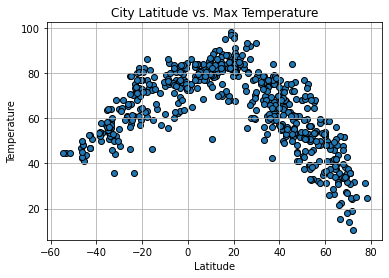

In [20]:
x_values = new_df_humidity['Lat']
y_values = new_df_humidity['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

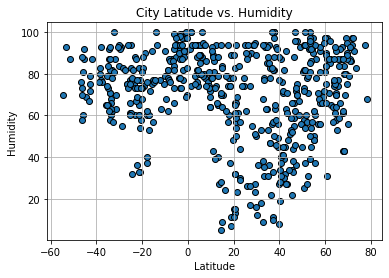

In [21]:
x_values = new_df_humidity['Lat']
y_values = new_df_humidity['Humidity']
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

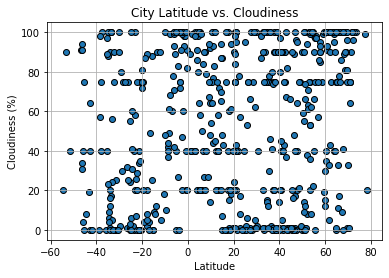

In [22]:
x_values = new_df_humidity['Lat']
y_values = new_df_humidity['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

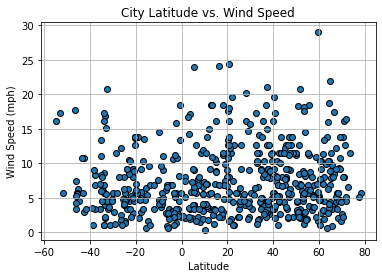

In [23]:
x_values = new_df_humidity['Lat']
y_values = new_df_humidity['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [45]:
North = new_df_humidity['Lat']>=0
north_h = new_df_humidity[North]
north_h.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Torbay,47.6666,-52.7314,41.00,75,20,12.66,CA,1621203687
4,Yangi Marg`ilon,40.4272,71.7189,66.20,34,80,9.22,UZ,1621203688
5,Iskateley,67.6803,53.1512,33.66,61,100,12.15,RU,1621203688
6,Lázaro Cárdenas,17.9583,-102.2000,86.88,60,1,11.21,MX,1621203689
7,Huadian,42.9633,126.7478,52.29,63,67,2.73,CN,1621203689


In [46]:
South = new_df_humidity['Lat']<0
South_h = new_df_humidity[South]
South_h.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,58.15,68,17,16.78,ZA,1621203687
1,Mossamedes,-15.1961,12.1522,74.52,57,0,5.39,AO,1621203687
3,Atuona,-9.8000,-139.0333,79.25,68,10,14.54,PF,1621203688
9,Esperance,-33.8667,121.9000,53.60,71,100,16.11,AU,1621203690
12,Hithadhoo,-0.6000,73.0833,84.47,70,82,13.42,MV,1621203691


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.77x +92.54
The r-value is: 0.7090080725886592


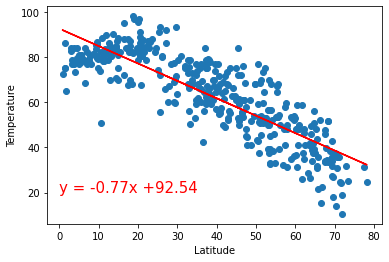

In [47]:
# Create Plot
x_values = north_h['Lat']
y_values = north_h['Max Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
#Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [89]:
South = new_weather['Lat']<0
South_h = new_weather[South]

y = 0.68x +80.0
The r-value is: 0.5880857773131023


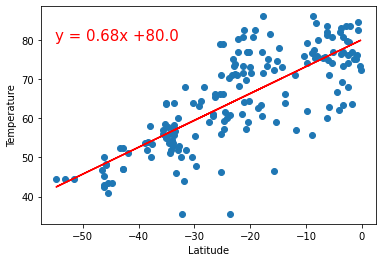

In [48]:
# Create Plot
x_values = South_h['Lat']
y_values = South_h['Max Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.07x +65.06
The r-value is: 0.00378543838403862


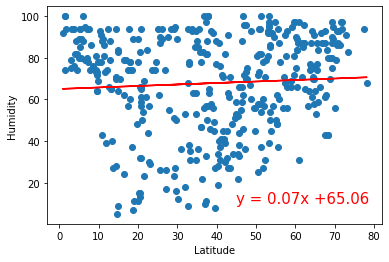

In [49]:
# Create Plot
x_values = north_h['Lat']
y_values = north_h['Humidity']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.22x +81.61
The r-value is: 0.04566491808360716


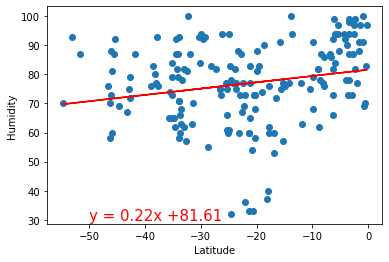

In [50]:
# Create Plot
x_values = South_h['Lat']
y_values = South_h['Humidity']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.24x +46.75
The r-value is: 0.016426779579621263


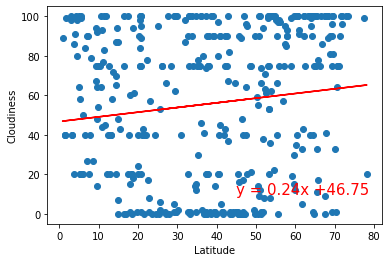

In [51]:
# Create Plot
x_values = north_h['Lat']
y_values = north_h['Cloudiness']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.58x +60.01
The r-value is: 0.0454727303032061


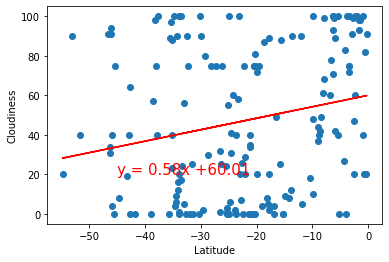

In [52]:
# Create Plot
x_values = South_h['Lat']
y_values = South_h['Cloudiness']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0035263772085582894


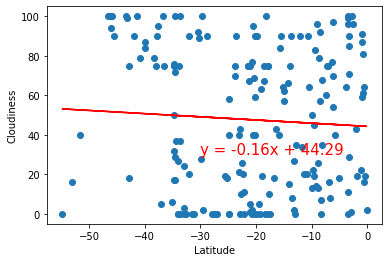

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.0x +7.6
The r-value is: 3.812817052055704e-05


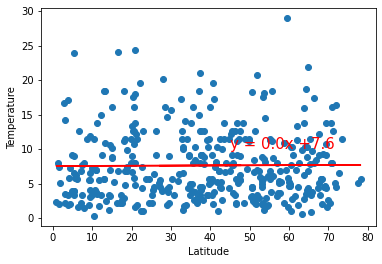

In [53]:
# Create Plot
x_values = north_h['Lat']
y_values = north_h['Wind Speed']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04019723576144484


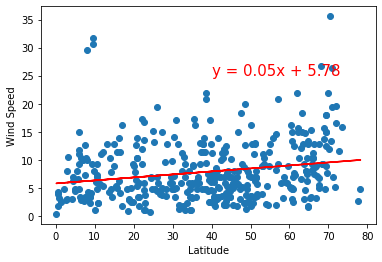

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.05x +5.41
The r-value is: 0.022248778139409


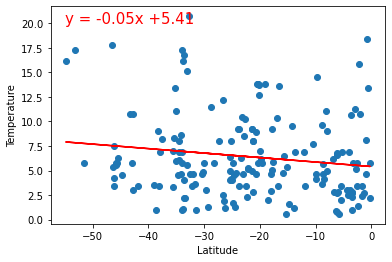

In [54]:
# Create Plot
x_values = South_h['Lat']
y_values = South_h['Wind Speed']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.017128274759839232


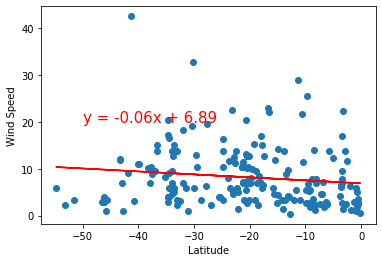